In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
import warnings; 
warnings.filterwarnings('ignore')

import os
import sys

sys.path.append(os.path.abspath('../'))
import abupy
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

only use pandas calc nd, please install talib!
enable example env will only read RomDataBu/df_kl.h5


# 第9章 量化系统-度量与优化

## 9.1 度量的基本使用方法

In [2]:
from abupy import AbuFactorBuyBreak
from abupy import AbuFactorAtrNStop
from abupy import AbuFactorPreAtrNStop
from abupy import AbuFactorCloseAtrNStop
# run_loop_back等一些常用且最外层的方法定义在abu中
from abupy import abu

# 设置初始资金数
read_cash = 1000000
# 设置选股因子，None为不使用选股因子
stock_pickers = None
# 买入因子依然延用向上突破因子
buy_factors = [{'xd': 60, 'class': AbuFactorBuyBreak},
               {'xd': 42, 'class': AbuFactorBuyBreak}]

# 卖出因子继续使用上一章使用的因子
sell_factors = [
    {'stop_loss_n': 1.0, 'stop_win_n': 3.0,
     'class': AbuFactorAtrNStop},
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},
    {'class': AbuFactorCloseAtrNStop, 'close_atr_n': 1.5}
]
# 择时股票池
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG',
                  'usTSLA', 'usWUBA', 'usVIPS']
# 使用run_loop_back运行策略
abu_result_tuple, kl_pd_manager = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   stock_pickers,
                                                   choice_symbols=
                                                   choice_symbols,
                                                   n_folds=2)

买入后卖出的交易数量:67
胜率:55.2239%
平均获利期望:14.1076%
平均亏损期望:-7.7029%
盈亏比:2.3543
策略收益: 50.4448%
基准收益: 15.0841%
策略年化收益: 25.2224%
基准年化收益: 7.5420%
策略买入成交比例:80.0000%
策略资金利用率比例:27.2194%
策略共执行504个交易日


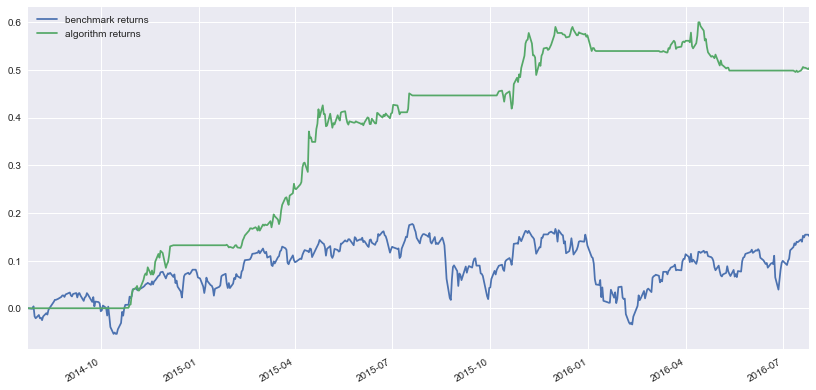

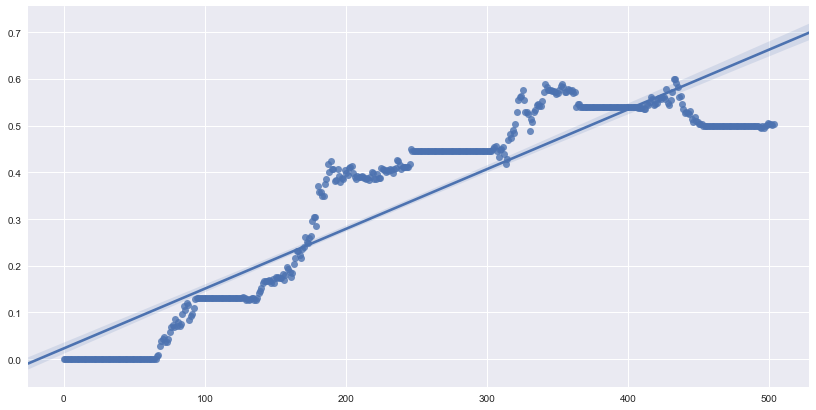

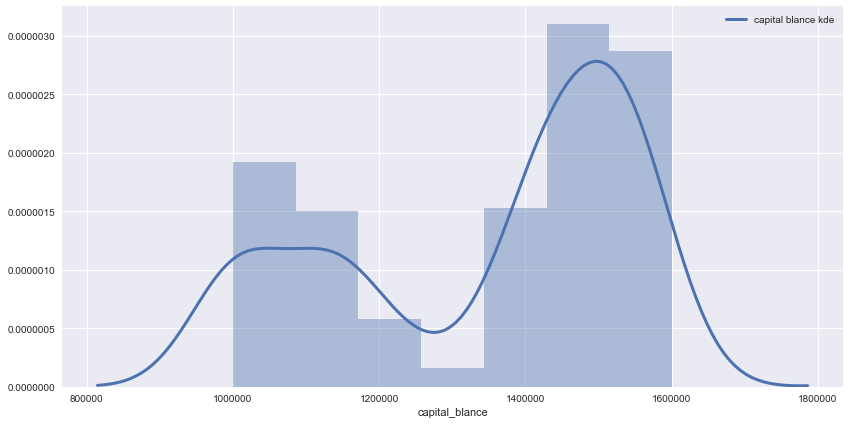

In [3]:
from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp()

### 9.2 度量的基础

### 9.2.1 度量的基础概念

### 9.2.2 度量的可视化

alpha阿尔法:0.1979
beta贝塔:0.1476
Information信息比率:0.0445
策略Sharpe夏普比率: 1.9564
基准Sharpe夏普比率: 0.5012
策略波动率Volatility: 0.1076
基准波动率Volatility: 0.1689


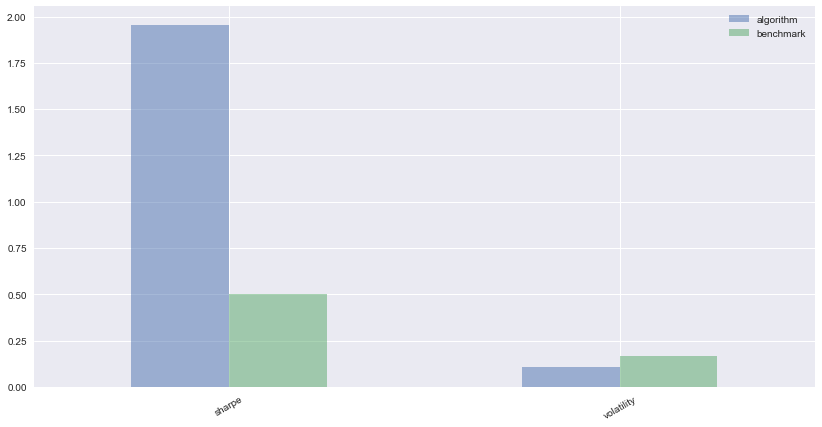

In [4]:
metrics.plot_sharp_volatility_cmp()

In [5]:
def sharpe(rets, ann=252):
    return rets.mean() / rets.std() * np.sqrt(ann)

print('策略sharpe值计算为＝{}'.format(sharpe(metrics.algorithm_returns)))

策略sharpe值计算为＝1.95641533363241


因子平均生效间隔:16.710526315789473


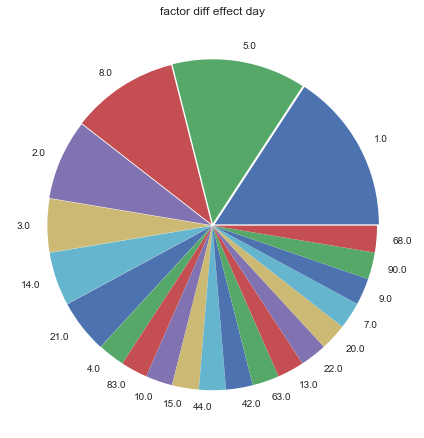

In [6]:
metrics.plot_effect_mean_day()

策略持股天数平均数: 40.857142857142854
策略持股天数中位数: 28.5


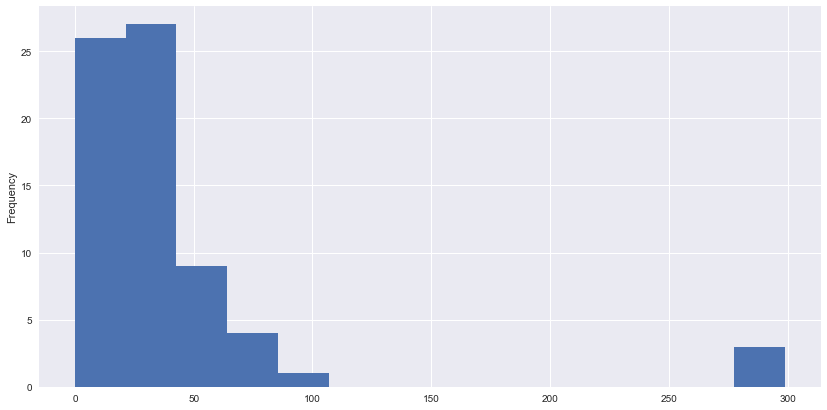

In [7]:
metrics.plot_keep_days()

卖出生效因子分布：
AbuFactorAtrNStop:stop_loss=1.0           18
AbuFactorAtrNStop:stop_win=3.0             9
AbuFactorCloseAtrNStop:close_atr_n=1.5    31
AbuFactorPreAtrNStop:pre_atr=1.5           9
dtype: int64


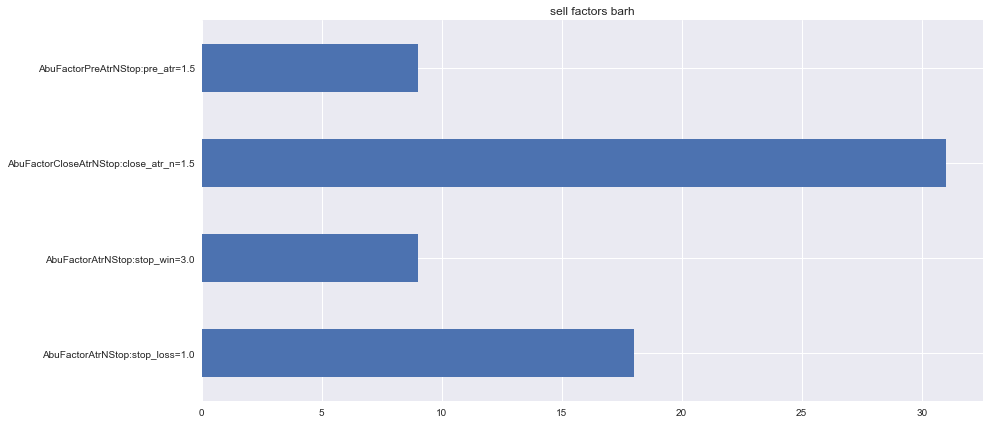

In [8]:
metrics.plot_sell_factors()

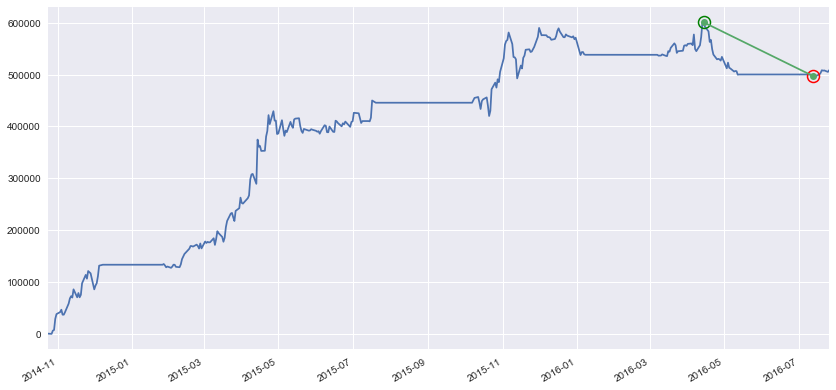

最大回撤: 0.06483096191700943
{(Timestamp('2016-04-14 00:00:00'), Timestamp('2016-07-13 00:00:00')): 103775.6649999998}


In [4]:
metrics.plot_max_draw_down()

## 9.3 基于grid search寻找因子最优参数

### 9.3.1 参数取值范围

In [3]:
stop_win_range = np.arange(2.0, 4.5, 0.5)
stop_loss_range = np.arange(0.5, 2, 0.5)

sell_atr_nstop_factor_grid = {
              'class': [AbuFactorAtrNStop],
              'stop_loss_n'   : stop_loss_range,
              'stop_win_n'   : stop_win_range
         }

print('止盈参数stop_win_n设置范围:{}'.format(stop_win_range))
print('止损参数stop_loss_n设置范围:{}'.format(stop_loss_range))

止盈参数stop_win_n设置范围:[ 2.   2.5  3.   3.5  4. ]
止损参数stop_loss_n设置范围:[ 0.5  1.   1.5]


In [4]:
close_atr_range = np.arange(1.0, 4.0, 0.5)
pre_atr_range = np.arange(1.0, 3.5, 0.5)

sell_atr_pre_factor_grid = {
              'class': [AbuFactorPreAtrNStop],
              'pre_atr_n' : pre_atr_range
         }

sell_atr_close_factor_grid = {
              'class': [AbuFactorCloseAtrNStop],
              'close_atr_n' : close_atr_range
         }

print('暴跌保护止损参数pre_atr_n设置范围:{}'.format(pre_atr_range))
print('盈利保护止盈参数close_atr_n设置范围:{}'.format(close_atr_range))

暴跌保护止损参数pre_atr_n设置范围:[ 1.   1.5  2.   2.5  3. ]
盈利保护止盈参数close_atr_n设置范围:[ 1.   1.5  2.   2.5  3.   3.5]


### 9.3.2 参数进行排列组合

In [5]:
from abupy import ABuGridHelper

sell_factors_product = ABuGridHelper.gen_factor_grid(
    ABuGridHelper.K_GEN_FACTOR_PARAMS_SELL,
    [sell_atr_nstop_factor_grid, sell_atr_pre_factor_grid, sell_atr_close_factor_grid])

print('卖出因子参数共有{}种组合方式'.format(len(sell_factors_product)))
print('卖出因子组合0形式为{}'.format(sell_factors_product[0]))

卖出因子参数共有477种组合方式
卖出因子组合0形式为[{'class': <class 'abupy.FactorSellBu.ABuFactorAtrNStop.AbuFactorAtrNStop'>, 'stop_loss_n': 0.5, 'stop_win_n': 2.0}, {'class': <class 'abupy.FactorSellBu.ABuFactorPreAtrNStop.AbuFactorPreAtrNStop'>, 'pre_atr_n': 1.0}, {'class': <class 'abupy.FactorSellBu.ABuFactorCloseAtrNStop.AbuFactorCloseAtrNStop'>, 'close_atr_n': 1.0}]


In [6]:
buy_bk_factor_grid1 = {
    'class': [AbuFactorBuyBreak],
    'xd': [42]
}

buy_bk_factor_grid2 = {
    'class': [AbuFactorBuyBreak],
    'xd': [60]
}

buy_factors_product = ABuGridHelper.gen_factor_grid(
    ABuGridHelper.K_GEN_FACTOR_PARAMS_BUY, [buy_bk_factor_grid1, buy_bk_factor_grid2])

print('买入因子参数共有{}种组合方式'.format(len(buy_factors_product)))
print('买入因子组合形式为{}'.format(buy_factors_product))

买入因子参数共有3种组合方式
买入因子组合形式为[[{'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 42}, {'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 60}], [{'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 42}], [{'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 60}]]


### 9.3.3 GridSearch寻找最优参数

In [8]:
from abupy import GridSearch

read_cash = 1000000
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG',
                  'usTSLA', 'usWUBA', 'usVIPS']
grid_search = GridSearch(read_cash, choice_symbols,
                         buy_factors_product=buy_factors_product,
                         sell_factors_product=sell_factors_product)

## 注意下面的运行耗时大约1小时多，如果所有cpu都用上的话，也可以设置n_jobs为 < cpu进程数，一边做其它的一边跑

In [8]:
%%time 
# 运行GridSearch n_jobs=-1启动cpu个数的进程数
scores, score_tuple_array = grid_search.fit(n_jobs=-1)

CPU times: user 2min 37s, sys: 13.5 s, total: 2min 51s
Wall time: 1h 17min 1s


## 针对运行完成输出的score_tuple_array可以使用dump_pickle保存在本地，以方便修改其它验证效果。

In [25]:
from abupy import ABuFileUtil
ABuFileUtil.dump_pickle(score_tuple_array, '../gen/score_tuple_array')

please wait! dump_pickle....: ../gen/score_tuple_array


## 可直接读取本地序列文件

In [26]:
from abupy import ABuFileUtil
score_tuple_array = ABuFileUtil.load_pickle('../gen/score_tuple_array')

please wait! load_pickle....: ../gen/score_tuple_array


In [ ]:
print('组合因子参数数量{}'.format(len(buy_factors_product) * len(sell_factors_product) ))
# 如果从本地序列文件中读取则没有scores
print('最终评分结果数量{}'.format(len(scores)))

买入后卖出的交易数量:38
胜率:60.5263%
平均获利期望:13.4462%
平均亏损期望:-6.0647%
盈亏比:3.2382
策略收益: 31.5812%
基准收益: 15.0841%
策略年化收益: 15.7906%
基准年化收益: 7.5420%
策略买入成交比例:100.0000%
策略资金利用率比例:18.0478%
策略共执行504个交易日


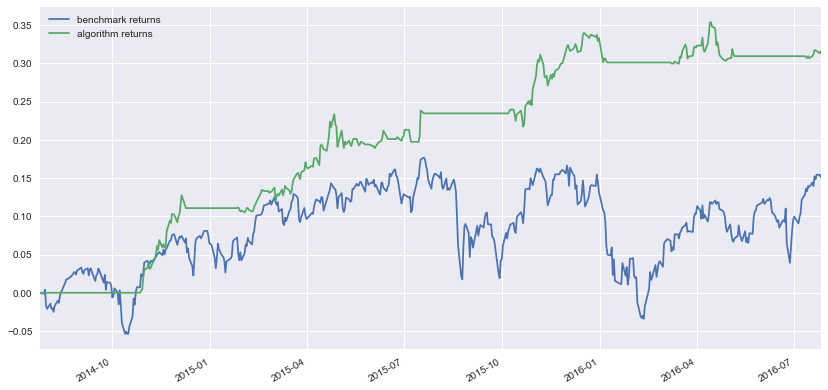

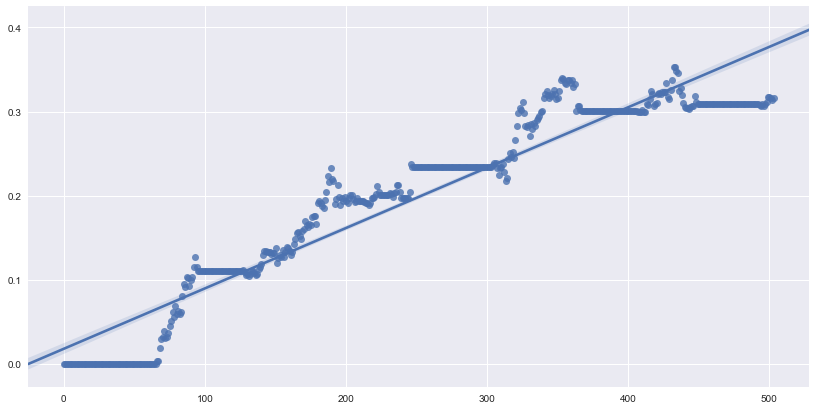

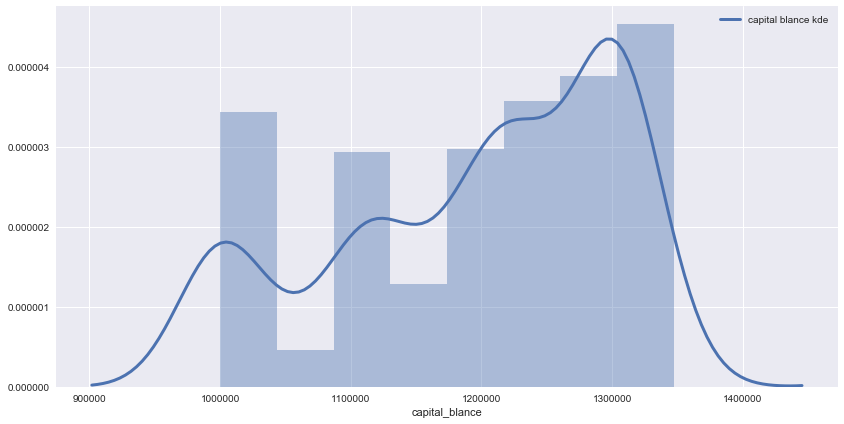

alpha阿尔法:0.1310
beta贝塔:0.1100
Information信息比率:0.0210
策略Sharpe夏普比率: 1.8907
基准Sharpe夏普比率: 0.5012
策略波动率Volatility: 0.0742
基准波动率Volatility: 0.1689


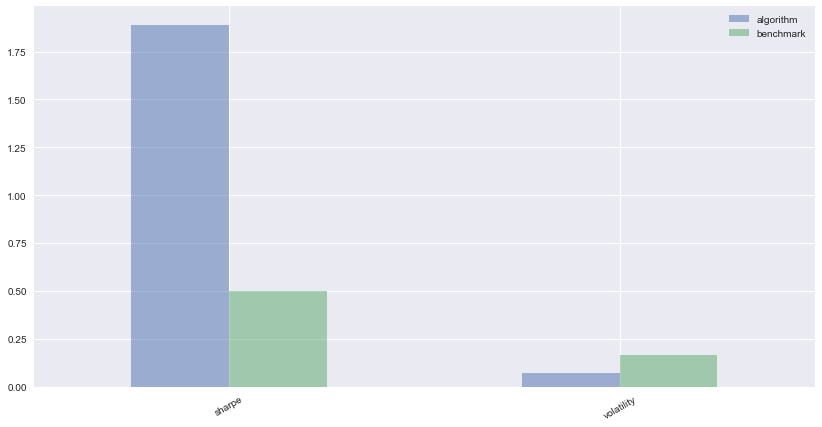

In [14]:
# 如果从本地序列文件中读取则没有grid_search.best_score_tuple_grid，只能从 9.3.4 度量结果的评分 开始运行
best_score_tuple_grid = grid_search.best_score_tuple_grid
AbuMetricsBase.show_general(best_score_tuple_grid.orders_pd, best_score_tuple_grid.action_pd,
                                        best_score_tuple_grid.capital, best_score_tuple_grid.benchmark)

### 9.3.4 度量结果的评分

In [12]:
from abupy import WrsmScorer
# 实例化一个评分类WrsmScorer，它的参数为之前GridSearch返回的score_tuple_array对象
scorer = WrsmScorer(score_tuple_array)

In [13]:
scorer.score_pd.tail()

,win_rate,returns,sharpe,max_drawdown,score_win_rate,score_returns,score_sharpe,score_max_drawdown,score
1426,0.809524,0.141468,0.498274,-0.216274,0.996503,0.635664,0.373427,0.062238,0.516958
1427,0.809524,0.125333,0.451617,-0.213694,0.996503,0.576224,0.346154,0.069231,0.497028
1428,0.761905,0.014189,0.126151,-0.291109,0.994406,0.170629,0.172727,0.016783,0.338636
1429,0.571429,-0.016942,0.025172,-0.286363,0.896503,0.106294,0.121678,0.018182,0.285664
1430,0.000000,-0.082140,-0.028205,-0.416743,0.000699,0.032867,0.097902,0.001399,0.033217


In [17]:
# score_tuple_array[658]与grid_search.best_score_tuple_grid是一致的
sfs = scorer.fit_score()
# 打印前15个高分组合
sfs[::-1][:15]

658    0.971853
664    0.964685
808    0.963811
688    0.962063
670    0.958392
838    0.955594
682    0.954371
676    0.954371
694    0.947552
657    0.946503
754    0.941783
687    0.941434
807    0.941259
724    0.939336
837    0.933741
Name: score, dtype: float64

### 9.3.5 不同权重的评分

In [18]:
# 实例化WrsmScorer，参数weights，只有第二项为1，其他都是0，
# 代表只考虑投资回报来评分
scorer = WrsmScorer(score_tuple_array, weights=[0, 1, 0, 0])
# 返回排序后的队列
scorer_returns_max = scorer.fit_score()
# 因为是倒序排序，所以index最后一个为最优参数
best_score_tuple_grid = score_tuple_array[scorer_returns_max.index[-1]]
# 由于篇幅，最优结果只打印文字信息
AbuMetricsBase.show_general(best_score_tuple_grid.orders_pd,
                            best_score_tuple_grid.action_pd,
                            best_score_tuple_grid.capital,
                            best_score_tuple_grid.benchmark,
                            only_info=True)

买入后卖出的交易数量:67
胜率:55.2239%
平均获利期望:14.1076%
平均亏损期望:-7.7029%
盈亏比:2.3543
策略收益: 50.4448%
基准收益: 15.0841%
策略年化收益: 25.2224%
基准年化收益: 7.5420%
策略买入成交比例:80.0000%
策略资金利用率比例:27.2194%
策略共执行504个交易日
alpha阿尔法:0.1979
beta贝塔:0.1476
Information信息比率:0.0445
策略Sharpe夏普比率: 1.9564
基准Sharpe夏普比率: 0.5012
策略波动率Volatility: 0.1076
基准波动率Volatility: 0.1689


In [19]:
# 最后打印出只考虑投资回报下最优结果使用的买入策略和卖出策略
best_score_tuple_grid.buy_factors, best_score_tuple_grid.sell_factors

([{'class': abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak, 'xd': 42},
  {'class': abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak, 'xd': 60}],
 [{'class': abupy.FactorSellBu.ABuFactorAtrNStop.AbuFactorAtrNStop,
   'stop_loss_n': 1.0,
   'stop_win_n': 3.0},
  {'class': abupy.FactorSellBu.ABuFactorPreAtrNStop.AbuFactorPreAtrNStop,
   'pre_atr_n': 1.5},
  {'class': abupy.FactorSellBu.ABuFactorCloseAtrNStop.AbuFactorCloseAtrNStop,
   'close_atr_n': 1.5}])

买入后卖出的交易数量:21
胜率:85.7143%
平均获利期望:19.0903%
平均亏损期望:-9.2893%
盈亏比:9.4105
策略收益: 21.5035%
基准收益: 15.0841%
策略年化收益: 10.7518%
基准年化收益: 7.5420%
策略买入成交比例:86.6667%
策略资金利用率比例:44.3042%
策略共执行504个交易日


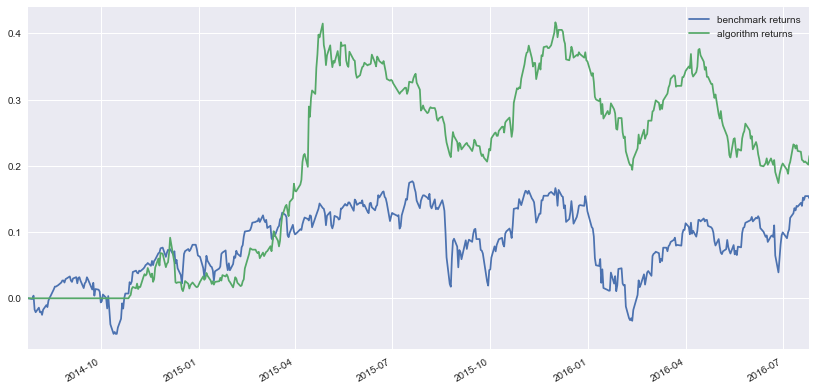

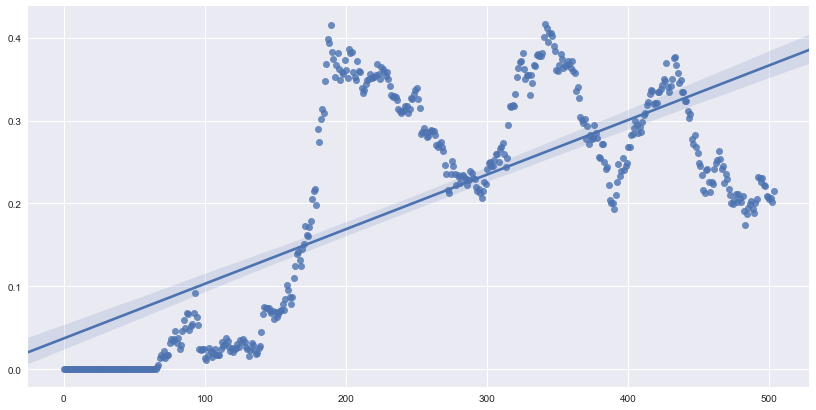

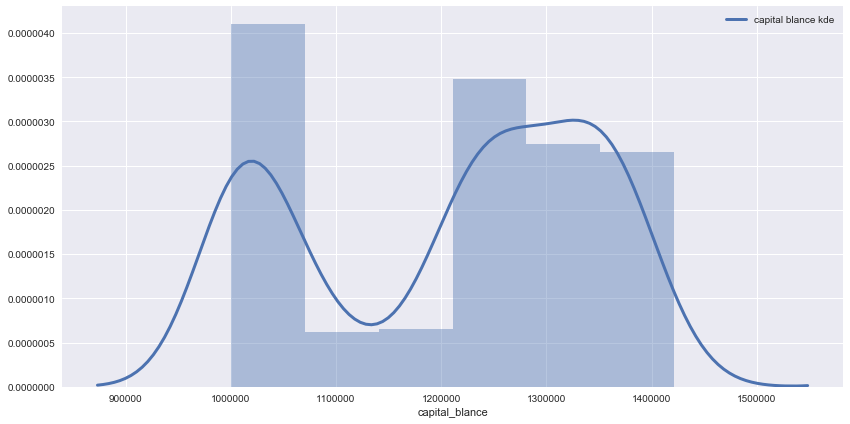

alpha阿尔法:0.0724
beta贝塔:0.4226
Information信息比率:0.0092
策略Sharpe夏普比率: 0.7392
基准Sharpe夏普比率: 0.5012
策略波动率Volatility: 0.1464
基准波动率Volatility: 0.1689


([{'class': abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak, 'xd': 60}],
 [{'class': abupy.FactorSellBu.ABuFactorCloseAtrNStop.AbuFactorCloseAtrNStop,
   'close_atr_n': 1.5}])

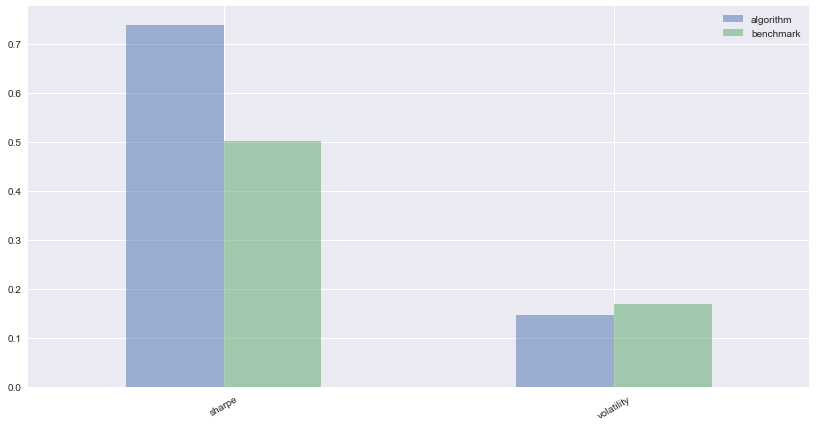

In [20]:
# 只有第一项为1，其他都是0代表只考虑胜率来评分
scorer = WrsmScorer(score_tuple_array, weights=[1, 0, 0, 0])
# 返回按照评分排序后的队列
scorer_returns_max = scorer.fit_score()
# index[-1]为最优参数序号
best_score_tuple_grid = score_tuple_array[scorer_returns_max.index[-1]]
AbuMetricsBase.show_general(best_score_tuple_grid.orders_pd,
                            best_score_tuple_grid.action_pd,
                            best_score_tuple_grid.capital,
                            best_score_tuple_grid.benchmark,
                            only_info=False)

# 最后打印出只考虑胜率下最优结果使用的买入策略和卖出策略
best_score_tuple_grid.buy_factors, best_score_tuple_grid.sell_factors


## 9.4 资金限制对度量的影响

## 关闭沙盒数据环境

In [3]:
abupy.env.disable_example_env_ipython()

disable example env


## 首选这里预下载市场中所有股票的6年数据, 做5年回测，需要预先下载6年数据

In [4]:
%%time
from abupy import abu, EMarketSourceType
# 切换数据源
abupy.env.g_market_source = EMarketSourceType.E_MARKET_SOURCE_tx
# 由于默认存储使用HDF5，hdf5不是数据库, 适合一次写入多次读取
abu.run_kl_update(n_folds=6, n_jobs=32)

CPU times: user 17min 26s, sys: 2min 19s, total: 19min 45s
Wall time: 17min 51s


设置E_DATA_FETCH_FORCE_LOCAL，实际上run_kl_update最后会把设置set到FORCE_LOCAL

In [29]:
from abupy import EMarketDataFetchMode
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

In [30]:
# 回测生成买入时刻特征
abupy.env.g_enable_ml_feature = True
# 回测将symbols切割分为训练集数据和测试集数据
abupy.env.g_enable_train_test_split = True

# 不同电脑运行速度差异大，mac pro顶配大概下面跑了4小时，运行一次后生成本地回测结果缓存，如果有缓存也可不运行回测，直接从本地缓存加载

In [31]:
# 初始化资金200万，资金管理依然使用默认atr
read_cash = 2000000
# 每笔交易的买入基数资金设置为万分之15
abupy.beta.atr.g_atr_pos_base = 0.0015
# 使用run_loop_back运行策略，因子使用和之前一样，
# choice_symbols=None为全市场回测，5年历史数据回测
abu_result_tuple, _ = abu.run_loop_back(read_cash,
                                        buy_factors, sell_factors,
                                        stock_pickers,
                                        choice_symbols=None,
                                        n_folds=5)
from abupy import EStoreAbu
# 把运行的结果保存在本地，以便之后分析回测使用，保存回测结果数据代码如下所示
abu.store_abu_result_tuple(abu_result_tuple, n_folds=5, store_type=EStoreAbu.E_STORE_TRAIN)

please wait! dump_pickle....: /Users/Bailey/abu/data/cache/n5_train_capital
please wait! dump_pickle....: /Users/Bailey/abu/data/cache/n5_train_benchmark


## 直接从本地缓存加载

In [ ]:
abu_result_tuple = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_TRAIN)

In [32]:
abu_result_tuple.action_pd.deal.value_counts()

False    113668
True      51953
Name: deal, dtype: int64

买入后卖出的交易数量:81134
胜率:44.8986%
平均获利期望:10.0778%
平均亏损期望:-6.0204%
盈亏比:1.3215
策略收益: 59.7046%
基准收益: 98.3523%
策略年化收益: 11.9409%
基准年化收益: 19.6705%
策略买入成交比例:30.6887%
策略资金利用率比例:87.9984%
策略共执行1260个交易日


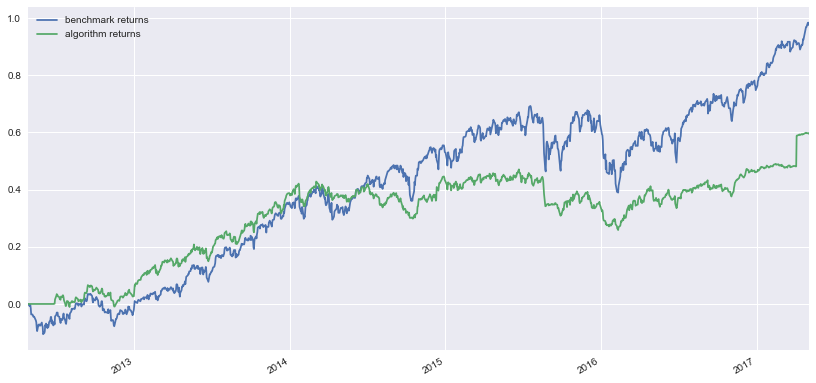

In [34]:
from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
# 图9-11所示
metrics.plot_returns_cmp(only_show_returns=True)

# 测试数据集快多了，大概半个小时内，如果有缓存也可不运行回测，直接从本地缓存加载

In [35]:
abupy.env.g_enable_train_test_split = False
abupy.env.g_enable_last_split_test = True

read_cash = 2000000
# 0.0015 * 10
abupy.beta.atr.g_atr_pos_base = 0.015 
choice_symbols = None
abu_result_tuple_test, kl_pd_manager_test = abu.run_loop_back(read_cash, 
                  buy_factors, sell_factors, stock_pickers, choice_symbols=choice_symbols, n_folds=5)
# 把运行的结果保存在本地，以便之后分析回测使用，保存回测结果数据代码如下所示
abu.store_abu_result_tuple(abu_result_tuple_test, n_folds=5, store_type=EStoreAbu.E_STORE_TEST)

please wait! dump_pickle....: /Users/Bailey/abu/data/cache/n5_test_capital
please wait! dump_pickle....: /Users/Bailey/abu/data/cache/n5_test_benchmark


## 直接从本地缓存加载

In [8]:
abu_result_tuple_test = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_TEST)

买入后卖出的交易数量:8652
胜率:44.4406%
平均获利期望:10.9360%
平均亏损期望:-6.1797%
盈亏比:1.3414
策略收益: 71.3346%
基准收益: 98.3523%
策略年化收益: 14.2669%
基准年化收益: 19.6705%
策略买入成交比例:30.6504%
策略资金利用率比例:86.6122%
策略共执行1260个交易日


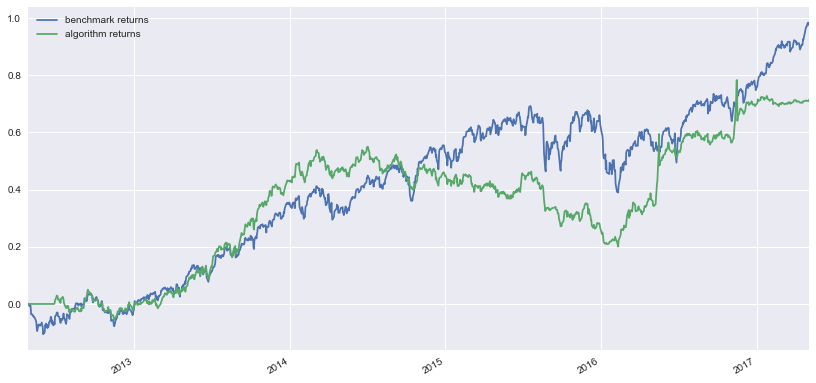

In [36]:
from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple_test)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)

## 把初始资金扩大到非常大，但是每笔交易的买入基数却不增高

In [11]:
abupy.env.g_enable_train_test_split = False
abupy.env.g_enable_last_split_test = False
# 使用上次切割好的训练集数据做回测
abupy.env.g_enable_last_split_train = True

## 设置初始资金数1个亿, mac pro顶配大概下面跑了4小时，运行一次后生成本地回测结果缓存，如果有缓存也可不运行回测，直接从本地缓存加载

In [12]:
# 设置初始资金数1个亿
read_cash = 100000000
# 100000000 * 0.0001 = 10000
abupy.beta.atr.g_atr_pos_base = 0.0001
abu_result_tuple_large, _ = abu.run_loop_back(read_cash,
                                              buy_factors,
                                              sell_factors,
                                              stock_pickers,
                                              choice_symbols=None,
                                              n_folds=5)
# 保存起来
abu.store_abu_result_tuple(abu_result_tuple_large, n_folds=5,
                           store_type=EStoreAbu.E_STORE_CUSTOM_NAME, custom_name='train_large')

pid:3834 pick times complete:100%


## 直接从本地缓存加载

In [ ]:
from abupy import EStoreAbu
abu_result_tuple_large = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, custom_name='train_large')

In [13]:
abu_result_tuple_large.action_pd.deal.value_counts()

True    172779
Name: deal, dtype: int64

买入后卖出的交易数量:84726
胜率:44.58%
平均获利期望:9.74%
平均亏损期望:-6.07%
盈亏比:1.2544
策略收益: 10.71%
基准收益: 100.14%
策略年化收益: 2.14%
基准年化收益: 20.03%
策略买入成交比例: 100.0%
策略资金利用率比例: 26.81%
策略共执行1260个交易日


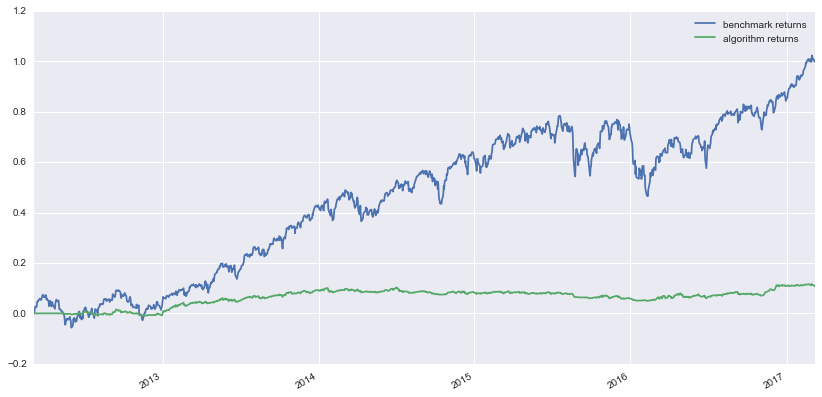

In [14]:
metrics = AbuMetricsBase(*abu_result_tuple_large)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)

## 满仓乘数

买入后卖出的交易数量:84726
胜率:44.58%
平均获利期望:9.74%
平均亏损期望:-6.07%
盈亏比:1.2544
策略收益: 43.69%
基准收益: 100.14%
策略年化收益: 8.74%
基准年化收益: 20.03%
策略买入成交比例: 100.0%
策略资金利用率比例: 26.81%
策略共执行1260个交易日


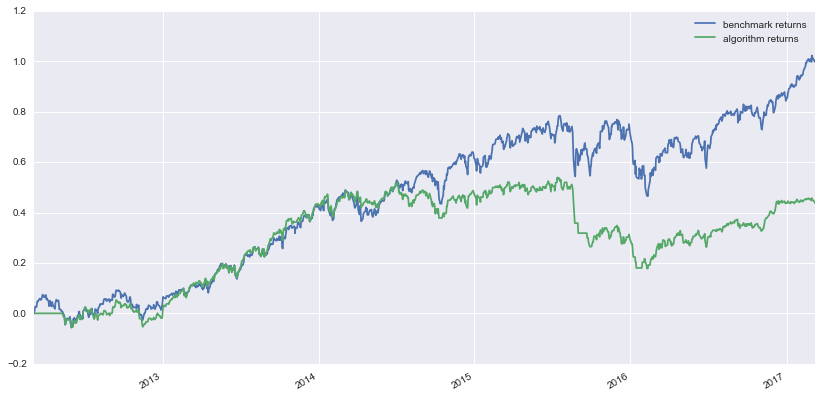

In [15]:
# 与上面代码唯一区别就是enable_stocks_full_rate_factor=True
metrics = AbuMetricsBase(*abu_result_tuple_large, enable_stocks_full_rate_factor=True)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)

In [16]:
# 如果不需要与基准进行对比，最简单的方式是使用plot_order_returns_cmp
metrics.plot_order_returns_cmp()

买入后卖出的交易数量:84726
胜率:44.58%
平均获利期望:9.74%
平均亏损期望:-6.07%
盈亏比:1.2544
所有交易收益比例和：875.0589 


_____

# 其它市场的回测

In [39]:
abupy.env.disable_example_env_ipython()

disable example env


## A股市场回测全局设置

In [40]:
from abupy import EMarketTargetType, abu
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_CN

## start, end参数: 不通过n_fold参数, 预下载a股数据，想做6年回测，下载7年数据，

In [41]:
%%time
start = '2010-04-26'
end = '2017-04-26'

abu.run_kl_update(start=start, end=end, n_jobs=32)

CPU times: user 15min 32s, sys: 2min 34s, total: 18min 7s
Wall time: 17min 22s


## A股市场训练集交易回测

### 耗时操作，运行一次后生成本地回测结果缓存，如果有缓存也可不运行回测，直接从本地缓存加载

In [ ]:
# 回测生成买入时刻特征
abupy.env.g_enable_ml_feature = True
# 回测将symbols切割分为训练集数据和测试集数据
abupy.env.g_enable_train_test_split = True

# 初始化资金800万
read_cash = 8000000
# 每笔交易的买入基数资金设置为万分之15
abupy.beta.atr.g_atr_pos_base = 0.0015
# 使用run_loop_back运行策略，因子使用和之前一样，
# choice_symbols=None为全市场回测，
# 不同电脑运行速度差异大，mac pro顶配大概下面跑了4小时，回测使用start, end参数
abu_result_tuple, _ = abu.run_loop_back(read_cash,
                                        buy_factors, sell_factors,
                                        stock_pickers,
                                        choice_symbols=None,
                                        start=start, end=end)
# 把运行的结果保存在本地，以便之后分析回测使用，保存回测结果数据代码如下所示
abu.store_abu_result_tuple(abu_result_tuple, n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME,
                           custom_name='train_a')
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)

### 直接读取缓存

In [7]:
from abupy import EStoreAbu
abu_result_tuple = abu.load_abu_result_tuple(n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                                             custom_name='train_a')

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_train_a_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_train_a_benchmark


True     50585
False    34238
Name: deal, dtype: int64


买入后卖出的交易数量:42247
胜率:44.86%
平均获利期望:13.83%
平均亏损期望:-7.74%
盈亏比:1.538
策略收益: 53.83%
基准收益: 6.9%
策略年化收益: 7.98%
基准年化收益: 1.02%
策略买入成交比例: 59.09%
策略资金利用率比例: 60.51%
策略共执行1700个交易日


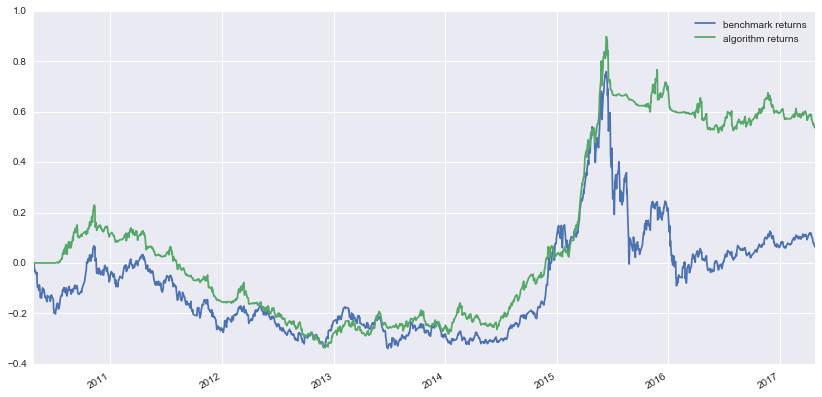

In [9]:
print(abu_result_tuple.action_pd.deal.value_counts())

metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)

## A股市场测试集交易回测

### 耗时操作，运行一次后生成本地回测结果缓存，如果有缓存也可不运行回测，直接从本地缓存加载

In [ ]:
abupy.env.g_enable_train_test_split = False
# 使用切割好的测试数据
abupy.env.g_enable_last_split_test = True
# 回测生成买入时刻特征
abupy.env.g_enable_ml_feature = True

# 初始化资金800万
read_cash = 8000000
# 0.0015 * 10
abupy.beta.atr.g_atr_pos_base = 0.015
choice_symbols = None
# 回测使用start, end参数
abu_result_tuple_test, kl_pd_manager_test = abu.run_loop_back(read_cash,
                                                             buy_factors, sell_factors, stock_pickers,
                                                             choice_symbols=choice_symbols,
                                                             start=start, end=end)
abu.store_abu_result_tuple(abu_result_tuple_test, n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME,
                           custom_name='test_a')

### 直接读取缓存

In [10]:
from abupy import EStoreAbu
abu_result_tuple_test = abu.load_abu_result_tuple(n_folds=6, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                                                  custom_name='test_a')

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_test_a_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n6_test_a_benchmark


True     5608
False    5010
Name: deal, dtype: int64


买入后卖出的交易数量:5288
胜率:46.48%
平均获利期望:12.22%
平均亏损期望:-7.12%
盈亏比:1.6378
策略收益: 88.76%
基准收益: 6.9%
策略年化收益: 13.16%
基准年化收益: 1.02%
策略买入成交比例: 52.35%
策略资金利用率比例: 61.45%
策略共执行1700个交易日


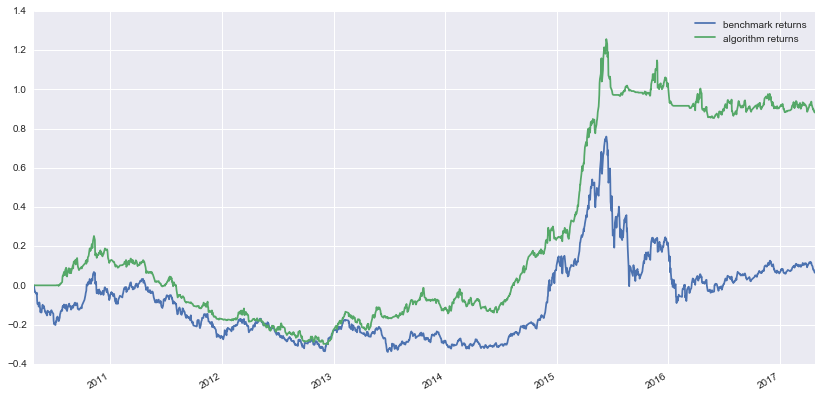

In [12]:
print(abu_result_tuple_test.action_pd.deal.value_counts())

metrics = AbuMetricsBase(*abu_result_tuple_test)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)